Saving student_info.csv to student_info.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


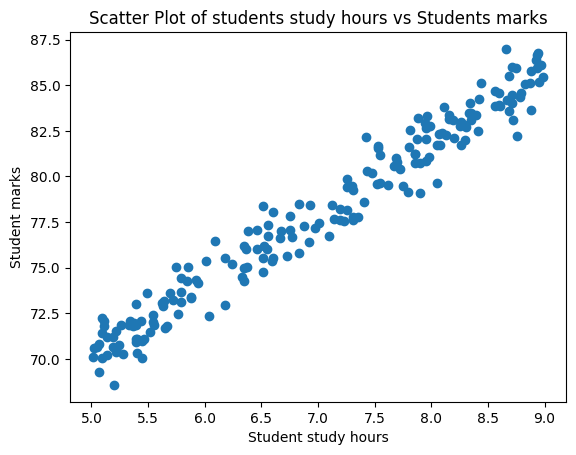

Shape of X :  (200, 1)
Shape of y :  (200,)
Shape of X_train :  (160, 1)
Shape of y_train :  (160,)
Shape of X_test :  (40, 1)
Shape of y_test :  (40,)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.12594512])

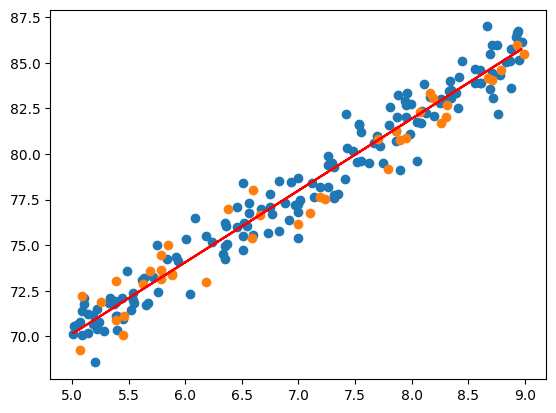

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("student_info.csv")
df.head()

df.tail()

df.shape

df.info()

df.describe()

plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Student study hours")
plt.ylabel("Student marks")
plt.title("Scatter Plot of students study hours vs Students marks")
plt.show()

#Prepare the data for model
# data cleaning
df.isnull().sum()

df.mean()  # give the numeric value of all numeric colum

df2 = df.fillna(df.mean())

df2.isnull().sum()

df2.head()

# split data
X = df2.drop("student_marks", axis=1)
y = df2["student_marks"]
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=51)
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train )

lr.coef_  # m

lr.intercept_  # c

lr.predict([[4]])[0]

y_predict = lr.predict(X_test)
y_predict

# Concate the actual and pridicted data
pd.DataFrame(np.c_[X_test, y_test, y_predict], columns = ["study_hours", "student_marks", "y_predict"])

#Fine tune model
lr.score(X_test, y_test)

plt.scatter(X_train,y_train)

plt.scatter(X_test, y_test)
plt.plot(X_train,lr.predict(X_train),color = "r")

"""Present you solution

Save ML Model
"""

import joblib  # Save the model
joblib.dump(lr, "student_marks_predictor.pkl")

#load the model
model = joblib.load("student_marks_predictor.pkl")

model.predict([[5]])